<h1 style="text-align:center;"> Automating Spatial Analysis with the ArcGIS API for Python</h1>

<img src="..\images\Puffin_oil.jpg"/>

<h2> Import packages and login to ArcGIS Online</h2>

In [1]:
# import packages
import arcgis
import datetime
from arcgis.gis import GIS
from getpass import getpass
from IPython.display import display
from arcgis.features.use_proximity import create_buffers
from arcgis.features.manage_data import overlay_layers
from arcgis.features import FeatureLayerCollection

In [2]:
# Login to ArcGIS Online
password=getpass()
gis = GIS("https://arcgis.com", "bhammersley_tech", password)

········


<h2> Get our puffin group and display content </h2>

<Group title:"Puffin Conservation" owner:bhammersley_tech>
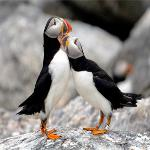

In [3]:
# get our group
Puffin_Group = gis.groups.search('Puffin Conservation')[0]
Puffin_Group

In [4]:
Wmap = gis.content.get('08ce9f4f24424e2887c9939c0d82ca1d')
Wmap.share(groups=Puffin_Group.id)

{'notSharedWith': [], 'itemId': '08ce9f4f24424e2887c9939c0d82ca1d'}

<Item title:"Oil_Spill_AC" type:Feature Layer Collection owner:bhammersley_tech>
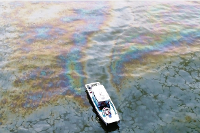

<Item title:"Puffin_Habitat_AC" type:Feature Layer Collection owner:bhammersley_tech>
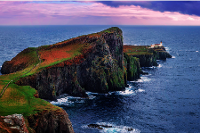

<Item title:"Puffin_Locations_AC" type:Feature Layer Collection owner:bhammersley_tech>
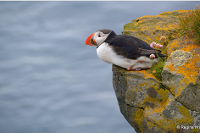

<Item title:"Threatened puffin habitat" type:Web Map owner:bhammersley_tech>
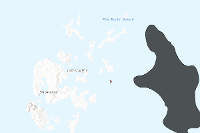

In [5]:
# list items in Puffin Conservation group
items = Puffin_Group.content()
for item in items:
    display(item)

<h2> Find puffin habitat at risk of exposure to the oil spill </h2>

In [6]:
# create a map of our area of interest
m = gis.map()
m

MapView(layout=Layout(height='400px', width='100%'))

In [7]:
# Specify the view
m.zoom = 7
m.center = [59.617161, -1.668248]

In [8]:
# Add the puffin habitat polygon layer
habitat = items[1]
m.add_layer(habitat)

In [9]:
# add the active oil_spill layer
oil_spill = items[0]
m.add_layer(oil_spill)

In [10]:
# buffer the active oil_spill boundaries and add as new content
timestamp = '{:%Y_%m_%d_%H_%M_%S}'.format(datetime.datetime.now())
oilbuffers = create_buffers(oil_spill, [30], None, 'Miles', output_name="Oil_Buffers_" + timestamp)

In [11]:
# add risk areas to map
m.add_layer(oilbuffers)

In [12]:
# run overlay analysis to determine habitat within the risk boundaries and add as new content
timestamp = '{:%Y_%m_%d_%H_%M_%S}'.format(datetime.datetime.now())
risk_habitat = overlay_layers(oilbuffers, habitat,                            
                        overlay_type="Intersect",
                        output_name="At_Risk_Habitat_" + timestamp)

In [13]:
# Update symbology of risk_habitat layer from an existing item used as a template

flc=FeatureLayerCollection.fromitem(risk_habitat)
template_layer = gis.content.get("61552a637bfb4e928d24fc022226cc2c").layers[0]
flc.layers[0].manager.update_definition({"drawingInfo": template_layer.properties['drawingInfo']})

{'success': True}

<h2> Update Webmap </h2>

In [15]:
# Get web map item from list of items we made earlier
webmapitem = items[3]

# create a webmap object from the item
webmap = arcgis.mapping.WebMap(webmapitem)
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [16]:
# remove the old layer from the web map
for lyr in webmap.layers:
    if lyr['id'].startswith('At_Risk_Habitat'):
        webmap.remove_layer(lyr)

# add our puffin habitat at risk of oil exposure we just generated in the analysis
webmap.add_layer(risk_habitat)

# Save changes to the webmap back to the GIS
webmap.update()

True

In [17]:
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [6]:
timestamp = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())
timestamp

'20190716151202'

In [8]:
timestamp2 = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())
timestamp2

'20190716151218'

In [9]:
int(timestamp2) - int(timestamp)

6